# Pandas and SQL
Explored Pandas and SQL to conduct comprehensive data analysis on a Spotify dataset encompassing song reviews and statistics to glean meaningful insights and created word cloud visualization.

## Part 0: Libraries and Set Up Jargon (The usual wall of imports)

In [1]:
!pip install -i https://test.pypi.org/simple/ penn-grader==0.5.0
!pip install pandasql

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=a827a6b9ac7c26b874e0afb726be6d2a721bd54dc46a79d7a95ddcf90ac10e38
  Stored in directory: /root/.cache/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql


In [2]:
from penngrader.grader import *
import pandas as pd
import datetime as dt
import pandasql as ps #SQL on Pandas Dataframe
import nltk
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
# Three datasets we're using
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_features.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_songs.csv
! wget -nc https://storage.googleapis.com/penn-cis5450/spotify_rankings.csv

--2023-02-18 20:02:56--  https://storage.googleapis.com/penn-cis5450/spotify_features.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9136 (8.9K) [text/csv]
Saving to: ‘spotify_features.csv’

spotify_features.cs 100%[===================>]   8.92K  --.-KB/s    in 0s      

2023-02-18 20:02:56 (39.0 MB/s) - ‘spotify_features.csv’ saved [9136/9136]

--2023-02-18 20:02:56--  https://storage.googleapis.com/penn-cis5450/spotify_songs.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 173.194.218.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12800 (12K) [text/csv]
Saving to: ‘spotify_songs.csv’

spotify_songs.csv

In [4]:
print(pd.__version__ )

1.3.5




# Music for everyone!

<br>
<center><img src = "https://upload.wikimedia.org/wikipedia/commons/3/33/Spotify_logo13.png" width= "500" align ="center"/></center>
<br>

We'll be working with a dataset containing Top Tracks on Spotify in 2017, along with their reviews and rankings.

In this homework, we'll be exploring the following attributes of the song data:

*   Song-specific metadata (eg. artist name) 

*   The songs' rankings based on date and listener location

*   Acoustic / musical properties of the song, eg. danceability


We'll be loading this data into various dataframes and querying them. We will primarily be using PandaSQL for these tasks. However, for some of the initial questions, we'll ask you to perform the same operations in Pandas. The purpose of conducting the same tasks in both Pandas and PandaSQL is to help you become more familiar with the similarites and differences of these two tools.

## Part 1: Load & Process our Datasets 

Before we get into the data, we first need to load and clean our datasets. 

# Metadata
You'll be working with three CSV files:
- `spotify_features.csv`
- `songs_features.csv`
- `spotify_rankings.csv`

The file `spotify_features.csv` contains musical / acoustic data for each song, obtained via the Spotify API.

The file `songs_features.csv` includes the names, artists, Spotify URLs of the Top Songs of 2017. 

Each row in the file `spotify_rankings.csv` contains a song's ranking on a specific day in a particular region, where regions are sorted alphabetically.

For example, the first 200 rows of `spotify_rankings.csv` represent the ranks of various songs on 1st of January in Argentina. The next 200 rows contain the  rankings of songs during the 2nd of January in Argentina. 

Note that the Spotify dataset may containing missing data, so don't rely on the interval between successive dates as 200 rows. 

Instead, it would be preferable to read all the data and then filter by region & date. This way, you can be sure that you have the required data.


**TODO**:
* Load `spotify_songs.csv` and save the data to a dataframe called `songs_df`.
* Load `spotify_rankings.csv` and save the data to a dataframe called `rankings_df`.
* Load `spotify_features.csv` and save the data to a dataframe called `features_df` without the index column being included.

**Note**: If you see a column called `Unnamed: 0` when loading the data, be sure to drop this column while loading the dataset. This is necessary for one to receive full credit in all the following parts of this homework.

In [49]:
# TODO: Import the datasets to pandas dataframes -- make sure the dataframes are named correctly! 
songs_df = pd.read_csv('spotify_songs.csv')
rankings_df = pd.read_csv('spotify_rankings.csv').drop('Unnamed: 0', axis = 1)
features_df = pd.read_csv('spotify_features.csv').drop('Unnamed: 0', axis = 1)

In [50]:
# view songs_df to make sure the import was successful
songs_df

,id,name,artists,duration_ms,time_signature,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,4,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,4,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,4,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,4,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,4,Your voice is awesome
...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,4,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,4,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,4,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,4,Good lyrics...


In [51]:
# view rankings_df to make sure the import was successful
rankings_df

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [11]:
# view features_df to make sure the import was successful
features_df

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7qiZfU4dY1lWllzX7mPBI,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.9310,95.977
1,5CtI0qwDJkDQGwXD1H1cL,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.8130,88.931
2,4aWmUDTfIPGksMNLV2rQP,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.8460,177.833
3,6RUKPb4LETWmmr3iAEQkt,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019
4,3DXncPQOG4VBw3QHh3S81,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.8110,80.924
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,0.675,0.690,2.0,-4.761,1.0,0.1320,0.2100,0.000000,0.2870,0.2720,137.817
96,0QsvXIfqM0zZoerQfsI9l,0.542,0.859,11.0,-5.651,1.0,0.1970,0.1600,0.004660,0.1370,0.4030,159.797
97,7mldq42yDuxiUNn08nvzH,0.731,0.469,5.0,-7.226,1.0,0.0326,0.4630,0.000001,0.1030,0.6310,98.963
98,7i2DJ88J7jQ8K7zqFX2fW,0.658,0.588,6.0,-4.902,0.0,0.0367,0.1050,0.000001,0.1250,0.4340,110.075


### 1.1 Data Preprocessing
We are now going to clean our dataframes `songs_df` and `rankings_df` by performing the following tasks:       
1) fixing columns        
2) changing datatypes             
3) handling nulls.

First, let us view the first few rows of `songs_df`. You may also call `.info()` and check the cardinality of each column to view the specifics of the dataframe. This is a good first step to take during Exploratory Data Analysis (EDA).

In [12]:
# view .info() for songs_df
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              100 non-null    object
 1   name            100 non-null    object
 2   artists         100 non-null    object
 3   duration_ms     100 non-null    int64 
 4   time_signature  100 non-null    int64 
 5   reviews         100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


#### 1.1.1 Cleaning `songs_df`

`.info()` gives us meaningful information regarding columns, their types, and the amount of nulls. With this information, we can now clean our dataframe. 

**TODO**:
* Drop the column `time_signature`.

In [52]:
# TODO: clean songs_df
songs_df = songs_df.drop('time_signature', axis = 1)
songs_df

,id,name,artists,duration_ms,reviews
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome
...,...,...,...,...,...
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track
97,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt,165387,Good melody. A little different
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...


In [53]:
# 3 points
grader.grade(test_case_id = 'test_cleaning_songs', answer = songs_df.head())

Correct! You earned 3/3 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.2 Processing Rankings

`rankings_df` contains a `URL` column that represents the URL of the Spotify track. This URL contains the track ID. We would like to extract the ID corresponding to each song. 

To maintain consistency, begin by sorting this dataframe according to `Date` in ascending order. 

**TODO**:
- Sort the `Date` column in ascending order
- Split the strings in the `URL` column to extract the ID for each song, and save this as a new column called `ID` in `rankings_df`
- Drop the `URL` column

**Example**:
>URL | ID
>--- | ---
> https://open.spotify.com/track/3AEZUABDXNtecAOSC1qTf | 3AEZUABDXNtecAOSC1qTf

After performing these steps, `rankings_df` should have the following schema:
**Final Schema**:
>Position | Track Name | Artist | Streams | Date | Region | ID
>--- | --- | --- |--- |--- |--- |--- |

**Hint**: Note the delimiter within the URL and consult the documentation for the `.split()` function

In [54]:
# TODO: sort on 'Date', extract ID, and drop URL
rankings_df = rankings_df.sort_values('Date', ascending = True)
rankings_df['ID'] = rankings_df['URL'].str.split('/').str[4]
rankings_df = rankings_df.drop('URL', axis = 1)

In [55]:
# 4 points
grader.grade(test_case_id = 'test_rankings_processing', answer = rankings_df.head())

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 1.1.3 Cleaning `rankings_df`

Now let's clean `rankings_df` and make it usable.

In [56]:
# Examine rankings_df using the .info() function
rankings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   Date        object
 5   Region      object
 6   ID          object
dtypes: int64(2), object(5)
memory usage: 210.0+ MB



**TODO**:
* Drop all rows that have a null value in `rankings_df`
* Convert column `Date` into type `datetime64[ns]`.


In [57]:
#TODO: 
rankings_df = rankings_df.dropna(how = 'any')
rankings_df['Date'] = rankings_df['Date'].astype('datetime64[ns]')

In [58]:
# 2 points
grader.grade(test_case_id = 'test_cleaning_rankings', answer = [len(rankings_df),rankings_df.head()])

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 1.2 Your Sandbox 

.info() is just one of many basic tools that you can use for Exploratory Data Analysis (EDA). Instead of throwing you straight into the deep end, we wanted to give you a chance to take some time and explore the data on your own. **This section is not graded**, so for the speedrunners out there feel free to just skip this section (1.2), but we wanted to at least give you a small space to utilize your EDA toolkit to familiarize yourself with all the data you just downloaded.

Some suggestions to get you started:
- `df.head()`
- `df.describe()`
- `Series.unique()`

In [20]:
# Your EDA here! Feel free to add more cells
rankings_df.head(10)
# rankings_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,3AEZUABDXNtecAOSC1qTf
2658317,118,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,Vice,15142,2017-01-01,nl,40UroIGvsMPLPBYwH8rMN
2658316,117,Dynamite (feat. Pretty Sister),Nause,15152,2017-01-01,nl,2Ae5awwKvQpTBKQHr1TYC
2658315,116,Hello,Adele,15170,2017-01-01,nl,4sPmO7WMQUAf45kwMOtON
2658314,115,One Night Stand,B-Brave,15510,2017-01-01,nl,2no9x9FRytP9PnB3CQPYS
2658313,114,I Was Made For Loving You,Tori Kelly,15560,2017-01-01,nl,3vOmmLuvEUgGaVuRsCs2Q
2658312,113,Ain't No Mountain High Enough,Marvin Gaye,15689,2017-01-01,nl,2H3ZUSE54pST4ubRd5FzF
2658311,112,Work,Rihanna,15749,2017-01-01,nl,14WWzenpaEgQZlqPq2nk4
2658310,111,Muhammad Ali,ChildsPlay,15811,2017-01-01,nl,07d579bKEYrN2tQ0Xb22n
2658309,110,Me and Julio Down by the Schoolyard,Paul Simon,15854,2017-01-01,nl,6vxHp3CDNo0afgKGp2yi1


## Part 2: Exploring the Data with PandasSQL (and Pandas) 

Now that you're more familiar with the dataset, we'll now introduce you to SQL language. Specifically, we'll be using **pandasql**: a library that allows users to query Pandas DataFrames using SQL statements.

The typical flow of using pandasql (shortened to **ps**) is as follows:
1. Write a SQL query in the form of a string (Tip: use triple quotes """x""" to write multi-line strings)
2. Run the query using **ps.sqldf(your_query, locals())**

PandaSQL is convenient as it allows you to reference the dataframes that are currently defined in your notebook, so you will be able to fully utilize the dataframes `songs_df`, `rankings_df` and `features_df` that you have created above!

Given that SQL is a brand new language, we wanted to give you a chance to directly compare the similarities &differences of Pandas and SQL. 
Thus, for each of the simpler queries, we ask that you **perform the tasks in each question twice: once with Pandas and once with PandaSQL**. 

Each answer (unless specified otherwise) will thus require two dataframes, one dataframe whose name is prefixed with `pd_`, and another dataframe whose name is prefixed with `sql_`. You will submit these two dataframes seperately to the autograder. **We will be reviewing your code to make sure your code for each dataframe is written in the correct language.**


###2.1 Bruno Mars songs


#### 2.1.1 How many Bruno Mars' songs were popular in 2017?

Note: Only Pandas is required for this question.
The dataframe `songs_df` contains all top songs in 2017. We want to know whether Bruno Mars was a part of it (he obviously was) - but which of his songs made it to the top?

**TODO:** Using **pandas**, filter out the songs and reviews from `songs_df` that were by `Bruno Mars`. Then, save this data to a DataFrame called `bruno_df` that has the following schema:

>name | reviews
>--- | ---



In [21]:
# TODO: Use pandas to obtain songs by `Bruno Mars`
check_bruno = songs_df.loc[songs_df['artists'] == 'Bruno Mars']
bruno_df = check_bruno[['name', 'reviews']]
bruno_df

,name,reviews
8,That's What I Like,You have a really cool voice! I like the way y...
59,24K Magic,Lyrics are very good. Backing sounds nice.


In [22]:
# 2 points
grader.grade(test_case_id = 'test_bruno', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.1.2 How many of Bruno Mars' songs were deemed "good"?
We now want to see which of these songs contained the word "good" in the `reviews` column.

**TODO:** Using **pandasql**, update `bruno_df` so that it only contains songs that have the word 'good' in the `reviews` column.

In [23]:
# TODO: Use pandasql to obtain only "good" songs of bruno mars
good_song_query = """ SELECT *
                      FROM bruno_df
                      WHERE reviews LIKE '%good%' """

bruno_df = ps.sqldf(good_song_query, locals())
bruno_df

,name,reviews
0,24K Magic,Lyrics are very good. Backing sounds nice.


In [24]:
# 2 points
grader.grade(test_case_id = 'test_good_songs_df', answer = bruno_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


###2.2 Finding the hit songs



#### 2.2.1 Extract the total no. of streams
We now want to see what songs formed the top 75% of the year 2017 from `rankings_df`. We can measure the popularity of the songs using the total number of streams the song received.

**TODO**: 
* Find the total number of streams per song and save it into a dataframe called `streams_df`
* Understand the quartile ranges in `streams_df`

**Hint**: you may find it helpful to look up `.describe()` to understand quartiles. It would be helpful to save the necessary quartile value to use in the querying section that follows.




In [25]:
# TODO: Using pandas extract the total number of streams per song from rankings_df
streams_df = rankings_df.groupby('Track Name', as_index = False)['Streams'].sum()
streams_df.describe()

,Streams
count,1.859700e+04
mean,9.598901e+06
std,6.903221e+07
min,1.001000e+03
25%,2.133400e+04
50%,1.225160e+05
75%,1.072171e+06
max,2.993989e+09


In [26]:
# 2 points
grader.grade(test_case_id = 'test_pd_describe', answer = len(streams_df))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.2.2 Top 75% of streams

Now that we've seen the distribution of the streams, we'd like to extract songs with streams within the top 75%, i.e 75% or more streams. For this part, use the quartile values you got via the `.describe()` function.

**TODO**: Using **pandas**, 
Filter out songs from `streams_df` whose stream count is in the top 75%, then save this data as the Pandas dataframe `pd_top_streams`.

In [27]:
# TODO: Using pandas extract the top 75% based on number of streams
pd_top_streams = streams_df[streams_df['Streams'] >= 2.133400e+04]
pd_top_streams

,Track Name,Streams
1,"""Read All About It, Pt. III""",57025
2,#99,31826
3,#Askip,296862
4,#Biziz - feat. Lil Bege,403591
5,#CTZK,669563
...,...,...
18592,전야 前夜 The Eve,976392
18593,지나갈 테니 Been Through,87456
18594,쩔어 DOPE,209493
18595,피 땀 눈물,68673


In [28]:
# 2 points
grader.grade(test_case_id = 'test_pd_songs', answer = pd_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Repeat this process using **pandasql**, and save the data in the variable `sql_top_streams`

In [29]:
# TODO: Using pandasql extract the top 75% based on number of streams
top_query = """ SELECT *
                FROM streams_df
                WHERE Streams >= 2.133400e+04 """

sql_top_streams = ps.sqldf(top_query, locals())
sql_top_streams

,Track Name,Streams
0,"""Read All About It, Pt. III""",57025
1,#99,31826
2,#Askip,296862
3,#Biziz - feat. Lil Bege,403591
4,#CTZK,669563
...,...,...
13943,전야 前夜 The Eve,976392
13944,지나갈 테니 Been Through,87456
13945,쩔어 DOPE,209493
13946,피 땀 눈물,68673


In [30]:
# 2 points
grader.grade(test_case_id = 'test_sql_songs', answer = sql_top_streams)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.3 Duration of songs


Now that we know which songs are hits, we'd like to listen to songs that are not too short nor too long.

**TODO**: Using **pandas**, 
Filter out songs from `songs_df` whose duration is between 3 and 5 minutes.

- Create a new column in `songs_df` called "duration_min" that converts the duration in "duration_ms" from milliseconds to minutes
- Extract only songs whose duration is at least 3 minutes and at most 5 minutes. Then, save the output to `ideal_songs_df`.


In [31]:
# TODO: pandas version
songs_df['duration_min'] = songs_df['duration_ms'] / 60000

ideal_songs_df = songs_df[songs_df['duration_min'].between(3,5)]
ideal_songs_df

,id,name,artists,duration_ms,reviews,duration_min
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,233713,vocal has a nice warm quality.,3.895217
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,228827,Very European feeling. I like that the singer ...,3.813783
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,228200,Unique and quirky. Arrangement was good and ni...,3.803333
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,247160,Tastefully put together song. Good instrumenta...,4.119333
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,288600,Your voice is awesome,4.810000
...,...,...,...,...,...,...
94,2fQrGHiQOvpL9UgPvtYy6,Bank Account,21 Savage,220307,"Good vocal, Good arrangement, Good subject mat...",3.671783
95,1PSBzsahR2AKwLJgx8ehB,Bad Things (with Camila Cabello),Machine Gun Kelly,239293,Good strong voice,3.988217
96,0QsvXIfqM0zZoerQfsI9l,Don't Let Me Down,The Chainsmokers,208053,good movie sound track,3.467550
98,7i2DJ88J7jQ8K7zqFX2fW,Now Or Never,Halsey,214802,Good lyrics...,3.580033


In [32]:
# 2 points
grader.grade(test_case_id = 'test_song_duration', answer = ideal_songs_df)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.4 Who are the highest ranked artists?

Which artists have been ranked #1 the most times in 2017?

**TODO**: Using the dataframe `rankings_df`, perform the following tasks twice, once using **pandas** and once using **pandasql**:
- Extract the names of artist that have `position` as 1, and store this data in `pd_pos_df`
- Using `pd_pos_df`, find the number of times each artist was ranked #1
- Get the Top 10 artists, i.e. the 10 artists which have been ranked #1 the most times. 

The dataframe `pd_pos_df` should have the following schema:

>Artist | Position
>--- | ---

In [33]:
# TODO: pandas version
pd_pos_df = rankings_df[rankings_df['Position'] == 1]
pd_pos_df = pd_pos_df.groupby('Artist', as_index = False)['Position'].count()
pd_pos_df = (pd_pos_df.sort_values('Position', ascending = False)).reset_index(drop = True).head(10)
pd_pos_df

,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


In [34]:
# TODO: pandasql version
pos_query = """ SELECT Artist, COUNT(Position) AS Position
                FROM rankings_df
                WHERE Position == 1
                GROUP BY Artist
                ORDER BY COUNT(Position) DESC 
                LIMIT 10 """         

sql_pos_df = ps.sqldf(pos_query, locals())
sql_pos_df

,Artist,Position
0,Luis Fonsi,4085
1,Ed Sheeran,3780
2,Post Malone,1737
3,J Balvin,1195
4,Maluma,900
5,Natti Natasha,416
6,Bad Bunny,311
7,Taylor Swift,304
8,Danny Ocean,291
9,Camila Cabello,272


In [35]:
# 6 points
grader.grade(test_case_id = 'test_artist_rank', answer = (pd_pos_df, sql_pos_df, pos_query))

Correct! You earned 6/6 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.5 Popular Artists!

Are there artists whose songs are streamed more often than others? Let's find out!

**TODO:**

Perform the following task involving the dataframe `rankings_df` twice, once using **pandas** and once using **pandasql**. Call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

- Consider rows in `rankings_df` that are during Summer 2017 
  - Note: Consider the duration of summer to be from 15th June 2017 to 16th September 2017 (both dates inclusive)
- Find the total number of streams corresponding to each artist, then store this data in a new column called `Number`. 
- Sort this dataframe on the `Number` column so that the most popular artists appear first (i.e. sort according to the `Number` column in descending order).
- Remember to call the output dataframe `pd_summer_df` or `sql_summer_df` (based on whether you used pandas or pandasql).

The dataframes `pd_summer_df` and `sql_summer_df` should both have the following schema:

>Artist | Number
>--- | ---



In [36]:
# TODO: pandas
pd_summer_df = rankings_df[rankings_df['Date'].between('2017-06-15', '2017-09-16')]
pd_summer_df = pd_summer_df.groupby('Artist')['Streams'].sum().reset_index(name = 'Number')
pd_summer_df = pd_summer_df.sort_values('Number', ascending = False)
pd_summer_df

,Artist,Number
766,Ed Sheeran,1331033447
584,DJ Khaled,1298364289
1657,Luis Fonsi,1186212514
435,Calvin Harris,1033045563
1183,J Balvin,1021849673
...,...,...
3005,Á Móti Sól,1052
1129,Huntar,1049
2666,The Panas,1032
2535,Stefán Hilmarsson,1022


In [37]:
#TODO: pandasql
summer_query = """ SELECT Artist, SUM(Streams) AS Number
                   FROM rankings_df
                   WHERE strftime('%Y-%m-%d', Date) BETWEEN '2017-06-15' AND '2017-09-16'
                   GROUP BY Artist
                   ORDER BY SUM(Streams) DESC """

sql_summer_df = ps.sqldf(summer_query, locals())
sql_summer_df

,Artist,Number
0,Ed Sheeran,1331033447
1,DJ Khaled,1298364289
2,Luis Fonsi,1186212514
3,Calvin Harris,1033045563
4,J Balvin,1021849673
...,...,...
3096,Á Móti Sól,1052
3097,Huntar,1049
3098,The Panas,1032
3099,Stefán Hilmarsson,1022


In [38]:
# 7 points
grader.grade(test_case_id = 'test_summer', answer = (summer_query,pd_summer_df,sql_summer_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.6 Which songs are danceable but also mellow?

Now let us switch gears and examine `songs_df` and `features_df`. In particular, we want to find the songs with high danceability and low tempo.

**TODO**: Perform the following tasks, once using **pandas** and once using **pandasql**:
- Before performing any operations,  round the `danceability` column to one decimal place, and call the resultant column `r_danceability`. This will allow us to conduct a more general (coarser) analysis of the data.
- Merge `songs_df` and `features_df`, then sort the songs with danceability in *descending* order and tempo in *ascending* order. (When sorting, make sure to use the `r_danceability` column.)
- Call the output dataframe `pd_songs_features_df` or `sql_songs_features_df` based on whether you used pandas or pandasql.


In [39]:
# TODO: pandas
features_df['danceability'] = features_df['danceability'].round(1)
pd_songs_features_df = features_df.rename(columns = {'danceability' : 'r_danceability'})
pd_songs_features_df = pd_songs_features_df[['id', 'r_danceability', 'tempo']]
pd_songs_features_df = pd_songs_features_df.merge(songs_df[['id', 'name']], left_on = ['id'], right_on = ['id'], how = 'left')
pd_songs_features_df = pd_songs_features_df.sort_values(['r_danceability', 'tempo'], ascending = [False, True])
pd_songs_features_df

,id,r_danceability,tempo,name
94,2fQrGHiQOvpL9UgPvtYy6,0.9,75.016,Bank Account
42,5bcTCxgc7xVfSaMV3RuVk,0.9,101.018,Feels
47,6mICuAdrwEjh6Y6lroV2K,0.9,102.034,Chantaje
38,6EpRaXYhGOB3fj4V2uDkM,0.9,106.028,Strip That Down
91,4c2W3VKsOFoIg2SFaO6DY,0.9,117.959,Your Song
...,...,...,...,...
52,4pdPtRcBmOSQDlJ3Fk945,0.5,199.864,Let Me Love You
22,5uCax9HTNlzGybIStD3vD,0.4,85.043,Say You Won't Let Go
63,6520aj0B4FSKGVuKNsOCO,0.4,189.798,Chained To The Rhythm
66,5hYTyyh2odQKphUbMqc5g,0.3,179.666,"How Far I'll Go - From ""Moana"""


In [40]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_pd', answer = pd_songs_features_df[['id', 'r_danceability', 'tempo']])

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


In [41]:
# TODO: pandasql version
song_feature_query = """ SELECT features_df.id, ROUND(danceability, 1) AS r_danceability, tempo, songs_df.id, name  
                         FROM features_df 
                         LEFT JOIN songs_df 
                         ON features_df.id = songs_df.id    
                         ORDER BY r_danceability DESC, tempo """

sql_song_features_df = ps.sqldf(song_feature_query, locals())
sql_song_features_df

,id,r_danceability,tempo,id,name
0,2fQrGHiQOvpL9UgPvtYy6,0.9,75.016,2fQrGHiQOvpL9UgPvtYy6,Bank Account
1,5bcTCxgc7xVfSaMV3RuVk,0.9,101.018,5bcTCxgc7xVfSaMV3RuVk,Feels
2,6mICuAdrwEjh6Y6lroV2K,0.9,102.034,6mICuAdrwEjh6Y6lroV2K,Chantaje
3,6EpRaXYhGOB3fj4V2uDkM,0.9,106.028,6EpRaXYhGOB3fj4V2uDkM,Strip That Down
4,4c2W3VKsOFoIg2SFaO6DY,0.9,117.959,4c2W3VKsOFoIg2SFaO6DY,Your Song
...,...,...,...,...,...
95,4pdPtRcBmOSQDlJ3Fk945,0.5,199.864,4pdPtRcBmOSQDlJ3Fk945,Let Me Love You
96,5uCax9HTNlzGybIStD3vD,0.4,85.043,5uCax9HTNlzGybIStD3vD,Say You Won't Let Go
97,6520aj0B4FSKGVuKNsOCO,0.4,189.798,6520aj0B4FSKGVuKNsOCO,Chained To The Rhythm
98,5hYTyyh2odQKphUbMqc5g,0.3,179.666,5hYTyyh2odQKphUbMqc5g,"How Far I'll Go - From ""Moana"""


In [42]:
# 4 points
grader.grade(test_case_id = 'test_danceability_tempo_sql', answer = sql_song_features_df)

Correct! You earned 4/4 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.7 Do we like the same songs?

#### 2.7.1 Which regions have the most streams?

**TODO**: 
Perform the following tasks, once using **pandas** and once using **pandasql**:
- Extract rows belonging to the top 2 regions that have the most streams. 
- Store your output in a new dataframe called `pd_top_regions_df` or `sql_top_regions_df` based on whether you used pandas or pandasql. Both of these dataframes should have same schema as `rankings_df`. Sort both these dataframes in descending order by `Streams`.

Note: Since we want to focus on specific regions, we should disregard rows where the `Region` column has the value `"global"`.

In [43]:
# TODO: pandas
top_regions = rankings_df.groupby('Region')['Streams'].sum().reset_index()
top_regions = top_regions.sort_values('Streams', ascending = False)
top_regions = top_regions[top_regions['Region']!= 'global'].nlargest(2, 'Streams', keep = 'first')

pd_top_regions_df = rankings_df.merge(top_regions, left_on = 'Region', right_on = 'Region', how = 'inner')  
pd_top_regions_df = pd_top_regions_df.drop(columns = 'Streams_y')  
pd_top_regions_df = pd_top_regions_df.rename(columns = {'Streams_x' : 'Streams'}) 

pd_top_regions_df = pd_top_regions_df.sort_values('Streams', ascending = False).reset_index()
pd_top_regions_df

,index,Position,Track Name,Artist,Streams,Date,Region,ID
0,94850,1,HUMBLE.,Kendrick Lamar,4068152,2017-04-14,us,7KXjTSCq5nL1LoYtL7XAw
1,120928,1,Look What You Made Me Do,Taylor Swift,3828478,2017-08-25,us,2VjtYe7gpfUi2OkGxR2O2
2,94851,2,DNA.,Kendrick Lamar,3643231,2017-04-14,us,6HZILIRieu8S0iqY8kIKh
3,95183,1,HUMBLE.,Kendrick Lamar,3526246,2017-04-15,us,7KXjTSCq5nL1LoYtL7XAw
4,95594,1,HUMBLE.,Kendrick Lamar,3394456,2017-04-18,us,7KXjTSCq5nL1LoYtL7XAw
...,...,...,...,...,...,...,...,...
148369,135,196,Famous,Kanye West,25248,2017-01-01,gb,19a3JfW8BQwqHWUMbcqSx
148370,134,197,Girls Just Want to Have Fun,Cyndi Lauper,25176,2017-01-01,gb,4y1LsJpmMti1PfRQV9AWW
148371,133,198,Dog Days Are Over,Florence + The Machine,24904,2017-01-01,gb,1YLJVmuzeM2YSUkCCaTNU
148372,132,199,Half the World Away - Remastered,Oasis,24806,2017-01-01,gb,6z1Xz89avh1KA7d3Ek7DQ


In [44]:
#TODO: pandasql
top_regions_query = """ SELECT *
                        FROM rankings_df
                        WHERE Region IN 
                        (
                        SELECT Region
                        FROM rankings_df
                        WHERE Region != 'global'

                        GROUP BY Region
                        ORDER BY SUM(Streams) DESC
                        LIMIT 2
                        )
                        ORDER BY Streams DESC """

sql_top_regions_df = ps.sqldf(top_regions_query, locals())
sql_top_regions_df

,Position,Track Name,Artist,Streams,Date,Region,ID
0,1,HUMBLE.,Kendrick Lamar,4068152,2017-04-14 00:00:00.000000,us,7KXjTSCq5nL1LoYtL7XAw
1,1,Look What You Made Me Do,Taylor Swift,3828478,2017-08-25 00:00:00.000000,us,2VjtYe7gpfUi2OkGxR2O2
2,2,DNA.,Kendrick Lamar,3643231,2017-04-14 00:00:00.000000,us,6HZILIRieu8S0iqY8kIKh
3,1,HUMBLE.,Kendrick Lamar,3526246,2017-04-15 00:00:00.000000,us,7KXjTSCq5nL1LoYtL7XAw
4,1,HUMBLE.,Kendrick Lamar,3394456,2017-04-18 00:00:00.000000,us,7KXjTSCq5nL1LoYtL7XAw
...,...,...,...,...,...,...,...
148369,196,Famous,Kanye West,25248,2017-01-01 00:00:00.000000,gb,19a3JfW8BQwqHWUMbcqSx
148370,197,Girls Just Want to Have Fun,Cyndi Lauper,25176,2017-01-01 00:00:00.000000,gb,4y1LsJpmMti1PfRQV9AWW
148371,198,Dog Days Are Over,Florence + The Machine,24904,2017-01-01 00:00:00.000000,gb,1YLJVmuzeM2YSUkCCaTNU
148372,199,Half the World Away - Remastered,Oasis,24806,2017-01-01 00:00:00.000000,gb,6z1Xz89avh1KA7d3Ek7DQ


In [45]:
# 7 points
grader.grade(test_case_id = 'test_top_regions', answer = (top_regions_query,  pd_top_regions_df.head(1000),  sql_top_regions_df.head(1000), 
                                                          len(pd_top_regions_df), len(sql_top_regions_df)))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


#### 2.7.2 Do the regions with the most streams like different songs?

**TODO**: Perform the following task, once using **pandas** and once using **pandasql**:
- Find the songs that the two regions (found in 2.7.1) **DO NOT** have in common
- Store the result in a new dataframe called `pd_diff_tracks_df` or `sql_diff_tracks_df` (based on whether you used pandas or pandasql). These two dataframes should both have the following schema:

>ID | Track Name | Artist
>--- | --- | ---

**Hint**: Do we need to join any tables here? If yes, which type of join should we use?

In [46]:
# TODO: pandas
songs_in_us = pd_top_regions_df[(pd_top_regions_df['Region'] == 'us')]
songs_in_us = songs_in_us.drop_duplicates('ID', keep = 'first')

songs_in_gb = pd_top_regions_df[(pd_top_regions_df['Region'] == 'gb')]
songs_in_gb = songs_in_gb.drop_duplicates('ID', keep = 'first')

only_us = songs_in_us[~songs_in_us['ID'].isin(songs_in_gb['ID'])]
only_gb = songs_in_gb[~songs_in_gb['ID'].isin(songs_in_us['ID'])]

pd_diff_tracks_df = pd.concat([only_us, only_gb])
pd_diff_tracks_df = pd_diff_tracks_df[['ID', 'Track Name', 'Artist']].reset_index(drop = True)
pd_diff_tracks_df

,ID,Track Name,Artist
0,4DTpngLjoHj5gFxEZFeD3,Codeine Dreaming (feat. Lil Wayne),Kodak Black
1,3tcoEYOZUHKB3RKNByIN1,For Real,Lil Uzi Vert
2,0DtxfqGupuWkfDCtz2lRG,America,Logic
3,5tRmoZRoupvMYPV1oezFr,X,Lil Uzi Vert
4,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt
...,...,...,...
2447,5PYPCxyWltRIyPkhSsnWI,"Engagement Party - From ""La La Land"" Soundtrack",Justin Hurwitz
2448,3ZeszLrkylVDyAFS9MLaj,You Don't Know Love,Olly Murs
2449,0jHkgTtTaqg5LNCiYDQPU,Let's Get It On,Marvin Gaye
2450,6tASfEUyB7lE2r6DLzURj,Club Tropicana,Wham!


In [47]:
#TODO: pandasql
diff_tracks_query = """ SELECT DISTINCT ID, [Track Name], Artist
                        FROM pd_top_regions_df 
                        WHERE Region == 'us' AND ID NOT IN
                        (
                        SELECT ID
                        FROM pd_top_regions_df 
                        WHERE Region == 'gb'
                        ) 

                        UNION All

                        SELECT DISTINCT ID, [Track Name], Artist
                        FROM pd_top_regions_df 
                        WHERE Region == 'gb' AND ID NOT IN
                        (
                        SELECT ID
                        FROM pd_top_regions_df 
                        WHERE Region == 'us'
                        ) """

sql_diff_tracks_df = ps.sqldf(diff_tracks_query, locals())
sql_diff_tracks_df

,ID,Track Name,Artist
0,4DTpngLjoHj5gFxEZFeD3,Codeine Dreaming (feat. Lil Wayne),Kodak Black
1,3tcoEYOZUHKB3RKNByIN1,For Real,Lil Uzi Vert
2,0DtxfqGupuWkfDCtz2lRG,America,Logic
3,5tRmoZRoupvMYPV1oezFr,X,Lil Uzi Vert
4,7mldq42yDuxiUNn08nvzH,Body Like A Back Road,Sam Hunt
...,...,...,...
2447,5PYPCxyWltRIyPkhSsnWI,"Engagement Party - From ""La La Land"" Soundtrack",Justin Hurwitz
2448,3ZeszLrkylVDyAFS9MLaj,You Don't Know Love,Olly Murs
2449,0jHkgTtTaqg5LNCiYDQPU,Let's Get It On,Marvin Gaye
2450,6tASfEUyB7lE2r6DLzURj,Club Tropicana,Wham!


In [48]:
# 15 points
grader.grade(test_case_id = 'test_diff_tracks', answer = (diff_tracks_query, pd_diff_tracks_df, sql_diff_tracks_df))

Correct! You earned 15/15 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 2.8 New Years Eve Party!

Who doesn't love to dance? Let's find some songs to groove to!

**TODO**: Perform the following tasks using **pandasql** only:

- Find the songs that made it to the charts in December 2017 (2017-12-01 to 2017-12-31) and whose duration is longer than 3 minutes
- Find the artist and the danceability of these songs. Be sure to only include songs with danceability > 0.5.
- Store the result in a new dataframe called `sql_dance_df` that has the following schema:

>Artist | Track Name | danceability
>--- | --- | ---


**Hint**: Think about which data resides in which table!

In [59]:
#TODO: pandasql
dance_query = """ SELECT DISTINCT Artist, [Track Name], danceability
                  FROM features_df                                 
                  LEFT JOIN songs_df ON features_df.id = songs_df.id
                  LEFT JOIN rankings_df ON features_df.id = rankings_df.ID
                  WHERE rankings_df.Date BETWEEN '2017-12-01' AND '2017-12-31' 
                  AND danceability > 0.5
                  AND (songs_df.duration_ms / 60000.0) > 3 """

sql_dance_df = ps.sqldf(dance_query, locals())
sql_dance_df

,Artist,Track Name,danceability
0,Ed Sheeran,Shape of You,0.825
1,Luis Fonsi,Despacito - Remix,0.694
2,Luis Fonsi,Despacito (Featuring Daddy Yankee),0.660
3,The Chainsmokers,Something Just Like This,0.617
4,DJ Khaled,I'm the One,0.609
...,...,...,...
80,Justin Bieber,Friends (with BloodPop®),0.744
81,21 Savage,Bank Account,0.884
82,Machine Gun Kelly,Bad Things (with Camila Cabello),0.675
83,The Chainsmokers,Don't Let Me Down,0.542


In [60]:
# 7 points
grader.grade(test_case_id = 'test_dance', answer = (dance_query, sql_dance_df))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## Part 3: Data Visualization 

The popularity of songs fluctuates as time progresses. We want to create a graph that illustrates the no. of streams for the most and least popular songs during each month in 2017.

Perform the following tasks:
- Find the song that had the *most* streams on `2017-01-01`
- Find the song that had the *least* streams on `2017-01-01`
- Find the no. of streams that these two songs received on the first day of each month in 2017 (eg. 2017-01-01, 2017-02-01, 2017-03-01 ... 2017-12-01) 

Plot a line graph which shows the trend you found! Make sure you use the ID of the two songs when creating this graph.

**Hint**: This link is a useful resource: https://seaborn.pydata.org/generated/seaborn.lineplot.html

Make sure your line graph has the following features:
1. The X-axis should be labelled "Date", and the Y-axis should be labelled "Streams".
2. There should be markers on the plot to specify the no. of streams each song received ia particular month.
3. The lines corresponding to the two songs should have different colors.

This section will be **manually graded**.


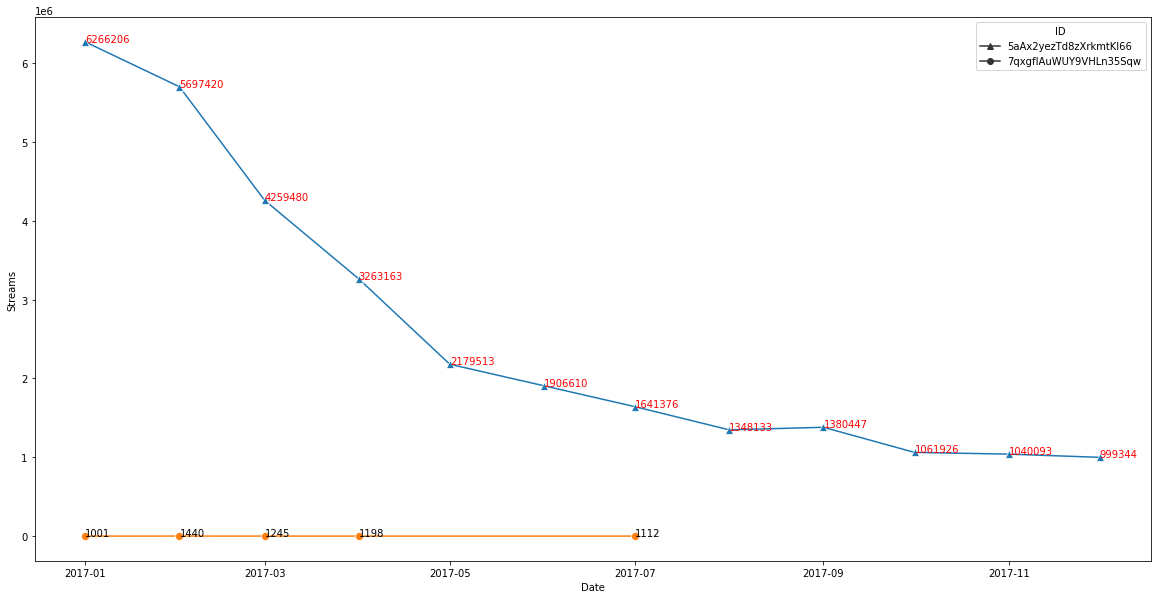

In [66]:
from seaborn.rcmod import palettes
# TODO: Plot a line chart
jan_rank = rankings_df.loc[rankings_df['Date'] == '2017-01-01']
jan_rank = (jan_rank.groupby(['ID', 'Track Name', 'Date']).agg({'Streams': 'sum'})).reset_index()

# find the songs with the most and least streams in Jan  
jan_most_popular = jan_rank[jan_rank['Streams'] == jan_rank['Streams'].max()]
jan_least_popular = jan_rank[jan_rank['Streams'] == jan_rank['Streams'].min()]

# The Most Stream Song ------
# filter rows with the most stream song and the first day of each month in 2017
rankings_df_new = rankings_df[['ID', 'Track Name', 'Date', 'Streams']]
most_popular = rankings_df_new.loc[rankings_df_new['ID'].isin(jan_most_popular['ID'])]

most_popular = most_popular.assign(first_day = most_popular['Date'].dt.is_month_start)
most_popular = most_popular[most_popular['first_day'] == True]
most_popular = most_popular[most_popular['Date'] != '2018-01-01']

most_popular = (most_popular.groupby(['ID', 'Date'])['Streams'].sum()).reset_index()

# The Least Stream Song ------
# filter rows with the least stream song and the first day of each month in 2017
least_popular = rankings_df_new.loc[rankings_df_new['ID'].isin(jan_least_popular['ID'])]
least_popular = least_popular.assign(first_day = least_popular['Date'].dt.is_month_start)
least_popular = least_popular[least_popular['first_day'] == True]

least_popular = (least_popular.groupby(['ID','Date'])['Streams'].sum()).reset_index()


# Plot A Line Chart ------
import seaborn as sns
plt.figure(figsize=(20,10))

sns.lineplot(data = most_popular, x = 'Date', y = 'Streams', style = 'ID', markers = '^', markersize = 8)
for x, y in zip(most_popular['Date'], most_popular['Streams']):
  plt.text(x = x, y = y, s = '{:.0f}'.format(y), color = 'red')
    
sns.lineplot(data = least_popular, x = 'Date', y = 'Streams', style = 'ID', markers = 'o', markersize = 8)
for x, y in zip(least_popular['Date'], least_popular['Streams']):
  plt.text(x = x, y = y, s = '{:.0f}'.format(y), color = 'black')

plt.show()

## Part 4: Working with Text Data 

Now, let's switch gears and try to text-based analysis. Textual data is complex, but can also be used to generate extremely interpretable results, making it both valuable and interesting. 

Throughout this section, we will attempt to answer the following question:

**According to the `songs_df` dataframe, what do the reviews for the Top Tracks of 2017 look like?**


###4.1 Tokenizing the text

We are going to split the contents of in the Reviews column into a list of words. We will use the **nltk** library, which contains an extensive set of tools for text processing. Now, this homework would be interminably long if we went into all the details of nltk. Thus, we are only going to use the following components of the library:
- `nltk.word_tokenize()`: a function used to tokenize text
- `nltk.corpus.stopwords`: a list of commonly used words such as "a", "an","in" that are often ignored in text analysis

Note that for this question, we didn't have to clean the text data first as our original dataset was well-formatted. However, in practice, we would typically clean the text first using regular expressions (regex). Keep this in mind as you work on the project later on in the semester.

**TODO:** Perform the following tasks:
- Use **nltk.corpus.stopwords** to create a set containing the most common English stopwords.
- Implement the function **tokenized_content(content)**, which takes in a string and does the following:
1. Tokenize the text
2. Keep tokens that only contain alphabetic characters (i.e. tokens with no punctuation)
3. Convert each token to lowercase
4. Remove stopwords (commonly used words such as "a", "an", "in")


In [67]:
import nltk
nltk.__version__

'3.7'

In [68]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [69]:
# TODO: tokenize and flatten
def tokenize_content(content):
  words = nltk.word_tokenize(content)
  words = [w.lower() for w in words if w.isalpha()]
  words = [w for w in words if w not in stopwords]
  return words

**TODO**: Also perform the following tasks: 
- Extract the `reviews` column of `songs_df` as a list called `reviews`. 
- Apply your `tokenize_content()` function to each item in the list `reviews`. Call the resultant list `top_tokens_list`. 
- Flatten the list `top_tokens_list`, and call the resultant list **top_tokens**. The autograder will be examining the contents of this list.

In [70]:
# TODO: tokenize and flatten
reviews = songs_df['reviews'].tolist()
top_tokens_list = [tokenize_content(sentence) for sentence in reviews]
top_tokens = [word for item in top_tokens_list for word in item]

In [71]:
# 2 point
grader.grade(test_case_id = 'test_top_tokens', answer = len(top_tokens))

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.2 Most Frequent Words
**TODO**: Now, find the 20 most common words in the list `top_tokens`. Save the result as a list of `(word, count)` tuples, in descending order of `count`.

**Hint**: For this question, you can use `Counter` from the Python `collections` library: https://docs.python.org/2/library/collections.html#counter-objects

In [72]:
from collections import Counter
top_most_common = Counter(top_tokens).most_common(20)

In [73]:
# 2 points
grader.grade(test_case_id = 'test_top_most_common', answer = top_most_common)

Correct! You earned 2/2 points. You are a star!

Your submission has been successfully recorded in the gradebook.


### 4.3 Word Clouds 

Before we move on from this dataset, let's visualize our results using a word cloud.

**TODO**: Create a word cloud containing all the words in the list `top_tokens` (created in question 4.1). [The WordCloud documentation](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html) contains instructions on how to do this. 

*Please make sure your wordcloud has a **white** background.*

We will be going through your notebooks and **manually grading** your word cloud. This is worth 10 points. 

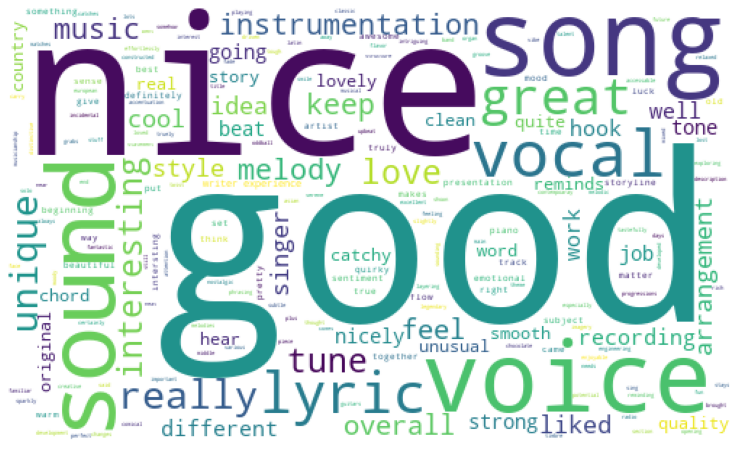

In [74]:
# TODO: make a word cloud for top tokens (MANUALLY GRADED)
from wordcloud import WordCloud

plt.subplots(figsize = (20,8))
wordcloud = WordCloud (background_color = 'white', width = 500, height = 300).generate(' '.join(top_tokens))

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()